## Quantum Dots - the extension of the single electron in a harmonic potential


Quantum dots are a prgression of a single electron in a harmonic potential, now we are considering multiple elctrons in a 3D ahrmonic potential. The potential $V(\vec{r})$ where $\vec{r} = \vec{x} + \vec{y} + \vec{z}$ is given by
$$ V(\vec{r}) = \frac{1}{2} m \omega^2 (x^2 + y^2 + z^2). $$
This for a single electon we get the following Hamiltonian
$$ \hat{H}_{single} = -\frac{\hbar^2}{2m} \nabla^2 + \frac{1}{2} m \omega^2(x^2 + y^2 + z^2). $$
Now, if we are considering a system with many electrons we need to introduce a coloumb interaction term to define how each electron will effect the other electrons in the well. We can do this by adding a coulomb interaction between electrons $i$ and $j$ given by
$$ \sum_{i<j} V_{coulomb}(r_i, r_j) = \sum_{i<j} \frac{e^2}{| r_i - r_j |},$$
where $r_i$ and $r_j$ are the positions of either electron in 3D space. Combining this and summing over all $N$ electrons we get the following Hamiltonian
\begin{equation}
    \hat{H} = \sum_{i=1}^{N} \big( -\frac{\hbar^2}{2m} \nabla_i^2 + \frac{1}{2} m \omega^2 (x_i^2 + y_i^2 + z_i^2) \big) + \sum_{i<j} V_{coulomb}(r_i, r_j)
\end{equation}


Hamiltonian
[[-148.5          40.5          -4.75       ...   -0.2987776
    -0.2937364    -0.28867513]
 [  40.5        -148.59972299   40.5        ...   -0.3037765
    -0.2987776    -0.2937364 ]
 [  -4.75         40.5        -148.68836565 ...   -0.30870852
    -0.3037765    -0.2987776 ]
 ...
 [  -0.2987776    -0.3037765    -0.30870852 ... -148.68836565
    40.5          -4.75      ]
 [  -0.2937364    -0.2987776    -0.3037765  ...   40.5
  -148.59972299   40.5       ]
 [  -0.28867513   -0.2937364    -0.2987776  ...   -4.75
    40.5        -148.5       ]]
Eigenvalues: [-7111.54743109 -1661.26557305 -1660.77542023 ...    55.72208151
    57.42625308    57.47387839]


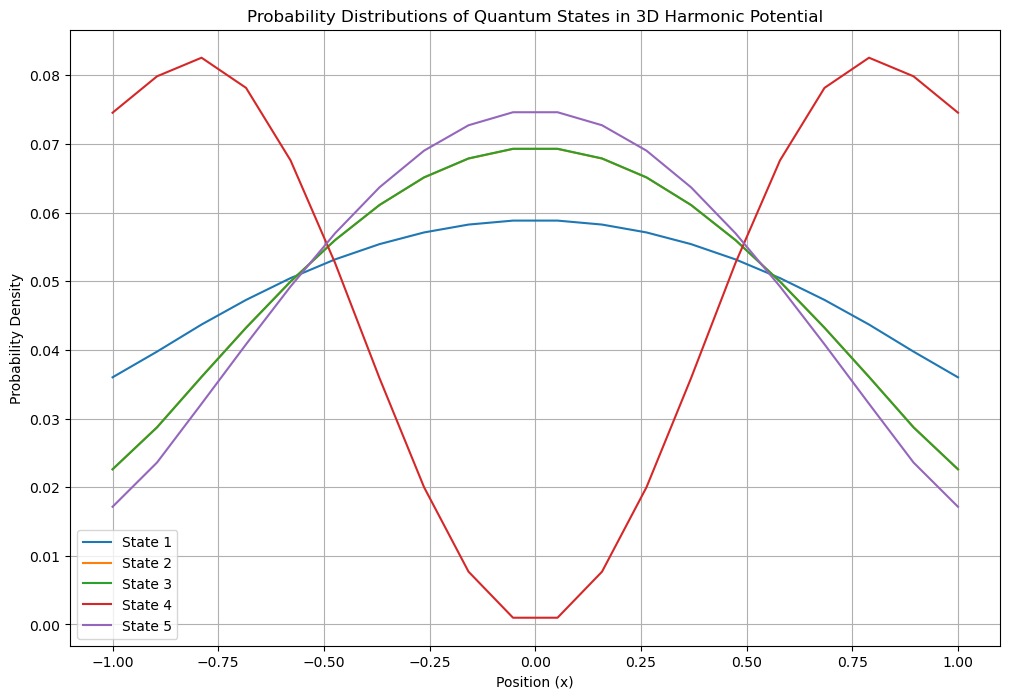

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def create_hamiltonian(N, omega, L, dx):
    """
    Create the Hamiltonian matrix for N electrons in a 3D harmonic potential
    with Coulomb interactions.

    Parameters:
    - N: Number of electrons.
    - omega: Frequency of the harmonic potential.
    - L: Length of the domain (width).
    - dx: Spacing between discretization points.

    Returns:
    - H: Hamiltonian matrix.
    """

    num_points = int(L / dx)
    x = np.linspace(-L / 2, L / 2, num_points)
    y = np.linspace(-L / 2, L / 2, num_points)
    z = np.linspace(-L / 2, L / 2, num_points)

    total_points = num_points ** 3

    H = np.zeros((total_points, total_points))

    # Kinetic energy operator (3D Laplacian)
    for i in range(total_points):
        H[i, i] += -3 / (2 * dx**2)

        neighbors = [
            i - 1, i + 1,    # x direction
            i - num_points, i + num_points,  # y direction
            i - num_points**2, i + num_points**2  # z direction
        ]
        
        for neighbor in neighbors:
            if 0 <= neighbor < total_points:
                H[i, neighbor] += 1 / (2 * dx**2)

    # Potential energy operator (3D harmonic potential)
    for i in range(total_points):

        ix, iy, iz = np.unravel_index(i, (num_points, num_points, num_points))
        potential_energy = 0.5 * omega**2 * (x[ix]**2 + y[iy]**2 + z[iz]**2)
        H[i, i] += potential_energy

    # Adding Coulomb interactions
    for i in range(total_points):
        for j in range(i + 1, total_points):

            ix1, iy1, iz1 = np.unravel_index(i, (num_points, num_points, num_points))
            ix2, iy2, iz2 = np.unravel_index(j, (num_points, num_points, num_points))
            r_ij = np.linalg.norm([x[ix1] - x[ix2], 
                                   y[iy1] - y[iy2], 
                                   z[iz1] - z[iz2]])
            if r_ij > 0:  # Avoid division by zero
                H[i, j] -= 1 / r_ij  # Coulomb repulsion
                H[j, i] -= 1 / r_ij  # Symmetric

    return H

def calculate_eigenvalues_and_vectors(H):
    """
    Calculate the eigenvalues and eigenvectors of the Hamiltonian.

    Parameters:
    - H: Hamiltonian matrix.

    Returns:
    - eigenvalues: The eigenvalues of the Hamiltonian.
    - eigenvectors: The eigenvectors of the Hamiltonian.
    """
    eigenvalues, eigenvectors = eigh(H)
    return eigenvalues, eigenvectors

def probability_distribution(eigenvectors):
    """
    Calculate the probability distribution from the eigenvectors.

    Parameters:
    - eigenvectors: The eigenvectors of the Hamiltonian.

    Returns:
    - prob_dists: Probability distributions for each eigenstate.
    """
    prob_dists = np.abs(eigenvectors) ** 2
    return prob_dists

def plot_probability_distributions(prob_dists, x, y, z, num_points):
    """
    Plot the probability distributions for the first few states.

    Parameters:
    - prob_dists: Probability distributions.
    - x, y, z: Position arrays.
    """
    plt.figure(figsize=(12, 8))
    num_states = min(5, prob_dists.shape[1])
    for i in range(num_states):

        prob_density = np.sum(prob_dists[:, i].reshape(num_points, num_points, num_points), axis=(1, 2))
        plt.plot(x, prob_density, label=f'State {i + 1}')
    
    plt.title('Probability Distributions of Quantum States in 3D Harmonic Potential')
    plt.xlabel('Position (x)')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid()
    plt.show()


def main(N, omega, L, dx):
    H = create_hamiltonian(N, omega, L, dx)
    print('Hamiltonian')
    print(H)
    eigenvalues, eigenvectors = calculate_eigenvalues_and_vectors(H)
    prob_dists = probability_distribution(eigenvectors)


    num_points = int(L / dx)
    x = np.linspace(-L / 2, L / 2, num_points)
    y = np.linspace(-L / 2, L / 2, num_points)
    z = np.linspace(-L / 2, L / 2, num_points)

    print("Eigenvalues:", eigenvalues)
    plot_probability_distributions(prob_dists, x, y, z, num_points)


main(N=2, omega=1.0, L=2.0, dx=0.1)


I think the above code is faulty - the number of electrons N in the system does not make the differenc eI woudl expect. It needs to be checked over.

Q: Also, am I making an unphysical assumptions that you can have a simple harmonic potential in 3D - would this not be a potential minimum in all 3 dimensions which is against Earnshaw's theorem?!

R: No, this is fine. Ernshaw's only applies to trapping with purely electrostatic fields. In quantum dots the confining potential is due to other things (like band structure(?))

Eigenvalues: [-1564.36883707  -421.54138599  -421.53342417]


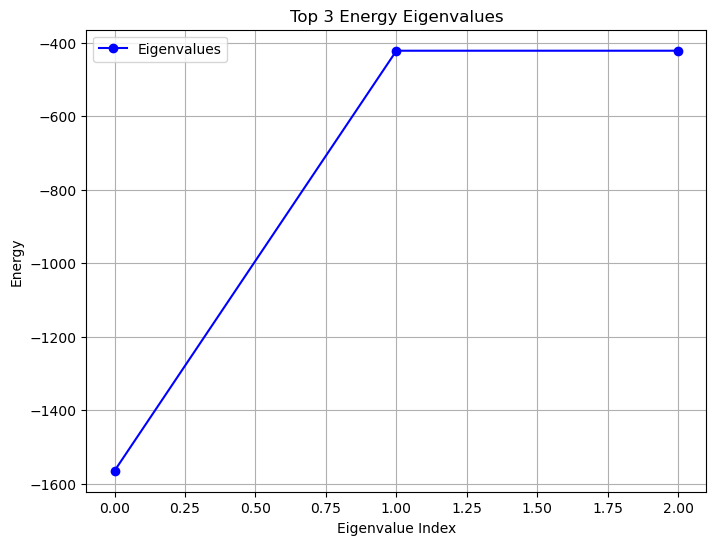

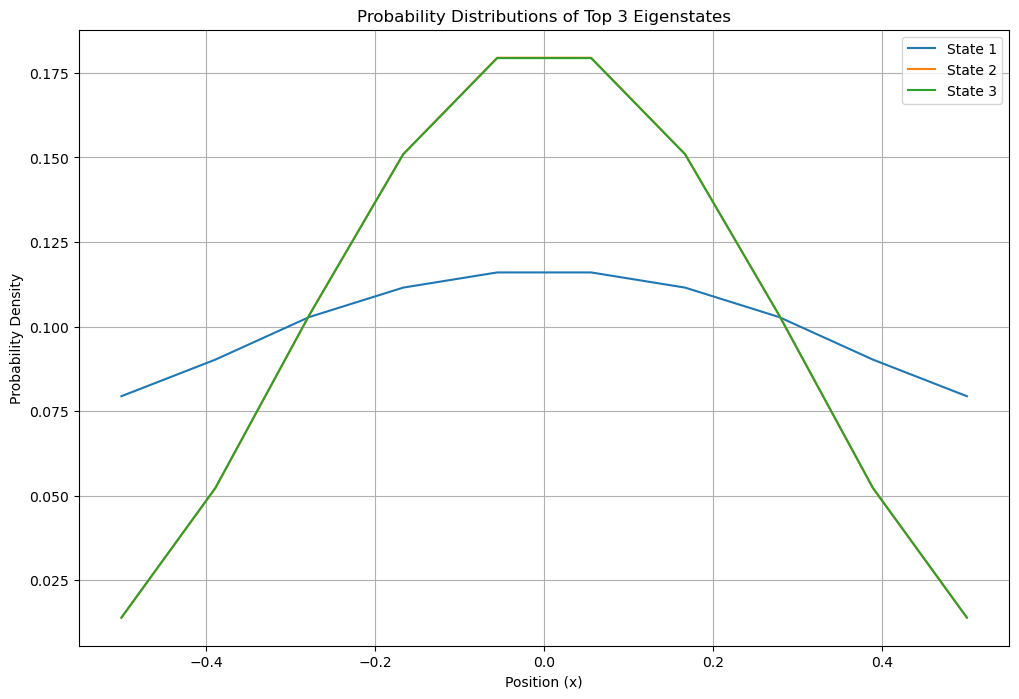

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def create_hamiltonian(N, omega, L, dx):
    """
    Create the Hamiltonian matrix for N electrons in a 3D harmonic potential
    with Coulomb interactions.

    Parameters:
    - N: Number of electrons.
    - omega: Frequency of the harmonic potential.
    - L: Length of the domain (width).
    - dx: Spacing between discretization points.

    Returns:
    - H: Hamiltonian matrix.
    """
    # Create position array for a 3D grid
    num_points = int(L / dx)
    x = np.linspace(-L / 2, L / 2, num_points)
    y = np.linspace(-L / 2, L / 2, num_points)
    z = np.linspace(-L / 2, L / 2, num_points)

    # Total number of grid points (3D)
    total_points = num_points ** 3

    # Initialize the Hamiltonian matrix
    H = np.zeros((total_points, total_points))

    # Kinetic energy operator (3D Laplacian)
    for i in range(total_points):
        H[i, i] += -3 / (2 * dx**2)  # Diagonal term
        
        # Off-diagonal terms for the kinetic energy
        # Checking neighbors in the 3D grid
        neighbors = [
            i - 1, i + 1,    # x direction
            i - num_points, i + num_points,  # y direction
            i - num_points**2, i + num_points**2  # z direction
        ]
        
        for neighbor in neighbors:
            if 0 <= neighbor < total_points:  # Valid neighbor index
                H[i, neighbor] += 1 / (2 * dx**2)

    # Potential energy operator (3D harmonic potential)
    for i in range(total_points):
        # Convert the linear index back to 3D coordinates
        ix, iy, iz = np.unravel_index(i, (num_points, num_points, num_points))
        potential_energy = 0.5 * omega**2 * (x[ix]**2 + y[iy]**2 + z[iz]**2)
        H[i, i] += potential_energy  # Add potential energy to diagonal

    # Adding Coulomb interactions between electrons
    for i in range(total_points):
        for j in range(i + 1, total_points):
            # Convert indices back to 3D coordinates
            ix1, iy1, iz1 = np.unravel_index(i, (num_points, num_points, num_points))
            ix2, iy2, iz2 = np.unravel_index(j, (num_points, num_points, num_points))
            r_ij = np.linalg.norm([x[ix1] - x[ix2], 
                                   y[iy1] - y[iy2], 
                                   z[iz1] - z[iz2]])
            if r_ij > 0:  # Avoid division by zero
                H[i, j] -= 1 / r_ij  # Coulomb repulsion
                H[j, i] -= 1 / r_ij  # Symmetric

    return H

def calculate_eigenvalues_and_vectors(H):
    """
    Calculate the eigenvalues and eigenvectors of the Hamiltonian.

    Parameters:
    - H: Hamiltonian matrix.

    Returns:
    - eigenvalues: The eigenvalues of the Hamiltonian.
    - eigenvectors: The eigenvectors of the Hamiltonian.
    """
    eigenvalues, eigenvectors = eigh(H)
    return eigenvalues, eigenvectors

def probability_distribution(eigenvectors):
    """
    Calculate the probability distribution from the eigenvectors.

    Parameters:
    - eigenvectors: The eigenvectors of the Hamiltonian.

    Returns:
    - prob_dists: Probability distributions for each eigenstate.
    """
    prob_dists = np.abs(eigenvectors) ** 2
    return prob_dists

def plot_eigenvalues(eigenvalues, n):
    """
    Plot the first 'n' eigenvalues.

    Parameters:
    - eigenvalues: The eigenvalues of the Hamiltonian.
    - n: Number of eigenvalues to plot.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(range(n), eigenvalues[:n], 'bo-', label='Eigenvalues')
    plt.title(f'Top {n} Energy Eigenvalues')
    plt.xlabel('Eigenvalue Index')
    plt.ylabel('Energy')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_probability_distributions(prob_dists, x, y, z, n):
    """
    Plot the probability distributions for the first few states.

    Parameters:
    - prob_dists: Probability distributions.
    - x, y, z: Position arrays.
    - n: Number of probability distributions to plot.
    """
    num_points = len(x)
    plt.figure(figsize=(12, 8))
    for i in range(n):
        # Sum over the y and z dimensions for 2D projection (along x)
        prob_density = np.sum(prob_dists[:, i].reshape(num_points, num_points, num_points), axis=(1, 2))  
        plt.plot(x, prob_density, label=f'State {i + 1}')
    
    plt.title(f'Probability Distributions of Top {n} Eigenstates')
    plt.xlabel('Position (x)')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid()
    plt.show()

# Main function to execute the simulation
def main(N=3, omega=1.0, L=10.0, dx=0.1, n_levels=5):
    H = create_hamiltonian(N, omega, L, dx)
    eigenvalues, eigenvectors = calculate_eigenvalues_and_vectors(H)
    prob_dists = probability_distribution(eigenvectors)

    # Create position arrays for plotting
    num_points = int(L / dx)
    x = np.linspace(-L / 2, L / 2, num_points)
    y = np.linspace(-L / 2, L / 2, num_points)
    z = np.linspace(-L / 2, L / 2, num_points)

    print("Eigenvalues:", eigenvalues[:n_levels])
    plot_eigenvalues(eigenvalues, n_levels)
    plot_probability_distributions(prob_dists, x, y, z, n_levels)

# Execute the main function
main(N=3, omega=1.0, L=1.0, dx=0.1, n_levels=3)
